In [3]:
import pandas as pd 
#pandas handle data frames, including reading of a csv or excel . To run any command from pandas type "pd." and command name

import numpy as np  
#numpy handles arrays, it is required as inputs to sklearn, and work in numpy is much faster than pandas.

import matplotlib.pyplot as plt 
# Matplot is the most popular tool for data visualization.

%matplotlib inline 
# In Jupyter, to see the plots on the execution lines use the magic command of %matplotlib inline.


# sklearn (Sci Kit Learn) includes many machine learning commands. Import what you need from it.
from sklearn.model_selection import train_test_split   # This is to prepare the data for the model
from sklearn.tree import DecisionTreeClassifier        # This is the selected model in this example

In [4]:
df = pd.read_csv("../Desktop/sf-bay-area-bike-share/station.csv") 
# df = pd.read_excel("C:/Users/gillis/Documents/_Personal/IDC/Business_Data_Analytics2018/Data/HR_comma_sep.xlsx")

In [5]:
len(df)

70

In [6]:
df

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013
5,7,Paseo de San Antonio,37.333798,-121.886943,15,San Jose,8/7/2013
6,8,San Salvador at 1st,37.330165,-121.885831,15,San Jose,8/5/2013
7,9,Japantown,37.348742,-121.894715,15,San Jose,8/5/2013
8,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013
9,11,MLK Library,37.335885,-121.885660,19,San Jose,8/6/2013


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
id                   70 non-null int64
name                 70 non-null object
lat                  70 non-null float64
long                 70 non-null float64
dock_count           70 non-null int64
city                 70 non-null object
installation_date    70 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ KB


In [8]:
df.describe()

,id,lat,long,dock_count
count,70.000000,70.000000,70.000000,70.000000
mean,43.000000,37.590243,-122.218416,17.657143
std,24.166092,0.203473,0.209446,4.010442
min,2.000000,37.329732,-122.418954,11.000000
25%,24.250000,37.389483,-122.400601,15.000000
50%,43.500000,37.631163,-122.312123,15.000000
75%,63.750000,37.788123,-122.078009,19.000000
max,84.000000,37.804770,-121.877349,27.000000


In [9]:
df["long"].value_counts()

-122.398525    1
-121.886995    1
-122.418603    1
-122.400811    1
-121.894902    1
-122.390288    1
-122.402717    1
-122.159504    1
-122.408499    1
-122.223492    1
-122.399051    1
-122.142805    1
-122.403452    1
-122.400862    1
-122.388013    1
-122.394643    1
-121.901782    1
-122.398436    1
-121.889937    1
-122.395260    1
-122.395470    1
-121.900084    1
-122.394434    1
-122.394203    1
-122.081896    1
-122.417385    1
-122.402923    1
-122.418954    1
-122.137777    1
-122.236234    1
              ..
-122.083678    1
-122.391034    1
-122.404767    1
-122.396236    1
-122.229951    1
-121.885831    1
-122.405127    1
-122.108338    1
-122.397086    1
-122.066553    1
-121.877349    1
-122.226904    1
-122.401014    1
-121.905733    1
-122.390637    1
-122.407245    1
-121.895617    1
-121.888979    1
-122.418235    1
-122.232089    1
-122.203288    1
-122.399970    1
-121.885660    1
-122.403234    1
-122.392738    1
-122.408433    1
-122.411748    1
-122.099076   

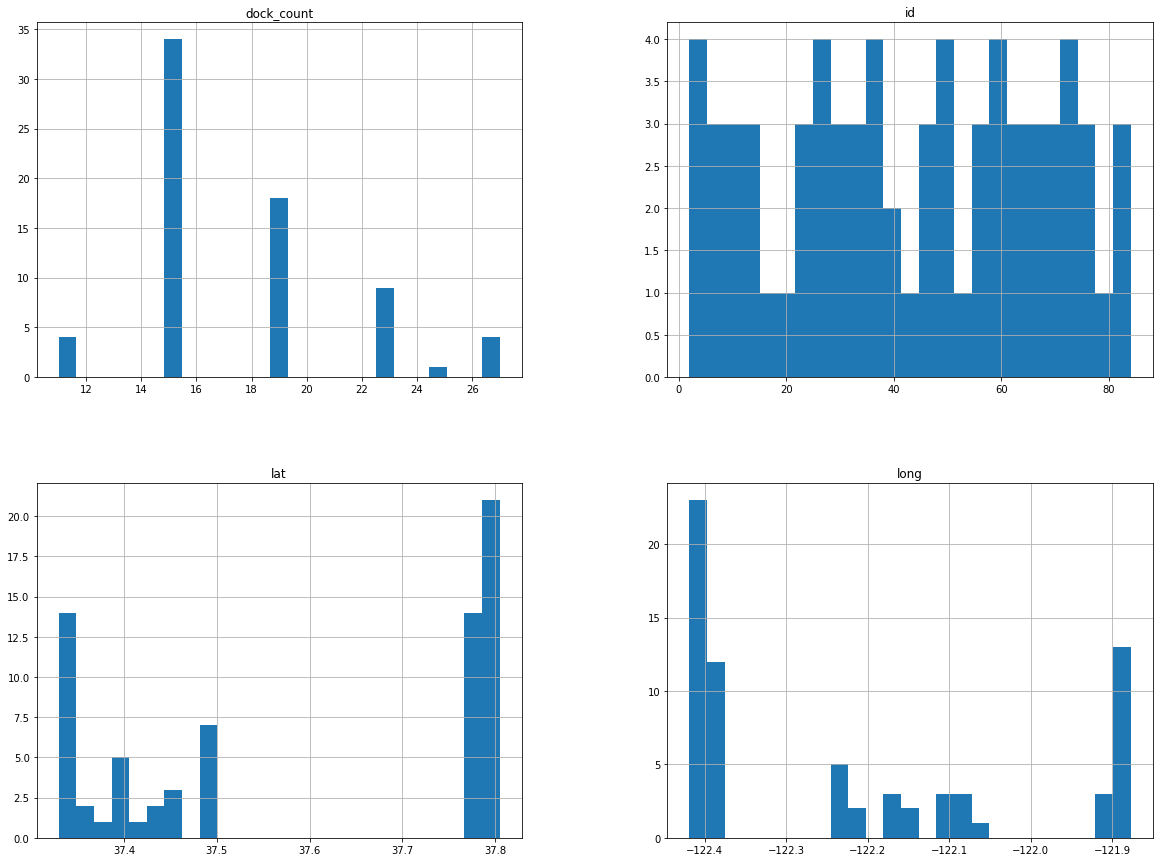

In [10]:
df.hist(bins = 25, figsize = (20,15)) #Check the hist parameters by clicking on the Tab completion. 
plt.show()

In [11]:
df_promoted = df[df['dock_count'] == 1]
df = df[df['dock_count'] == 0]
df = df.drop('dock_count', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 6 columns):
id                   0 non-null int64
name                 0 non-null object
lat                  0 non-null float64
long                 0 non-null float64
city                 0 non-null object
installation_date    0 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 0.0+ bytes


In [20]:
df = df.drop(columns=['lat','long'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 2 columns):
city                 0 non-null object
installation_date    0 non-null object
dtypes: object(2)
memory usage: 0.0+ bytes


In [22]:
# 1. Split between X the predictors and y the target
y = df['installation_date']
X = df.drop('installation_date', axis=1)

# 2. Turn from data frame to matrix: no indexes, number only
X = X.values  # X is a matrix of size 6 * 14,680
y = y.values  # y is a matrix of size 1 * 14,680, therefore it is a vector

# 3. Split X and y togather to train data set 80% and test data set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, lat = y)

TypeError: Invalid parameters passed: {'lat': array([], dtype=object)}